In [1]:
# Load modules and set-up test problem
import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt

import cuqi
from cuqi.testproblem import Deconvolution1D
from cuqi.distribution import Gaussian, JointDistribution
from cuqi.implicitprior import NonnegativeGMRF, RegularizedGMRF, RegularizedUnboundedUniform
from cuqi.sampler import RegularizedLinearRTO

from skimage.restoration import denoise_tv_chambolle

# Set seed
np.random.seed(42)

print("cuqi version: ", cuqi.__version__)

num_samples = 1000
num_burnin = 100

cuqi version:  0+untagged.3166.gb075822


Text(0.5, 1.0, 'Data')

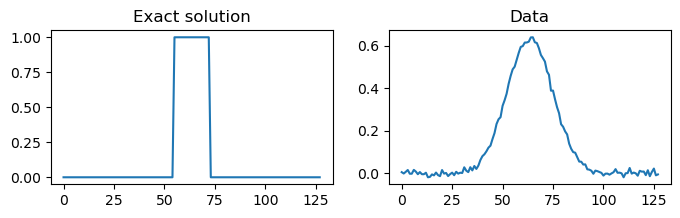

In [2]:
n = 128
A, y_data, info = Deconvolution1D(dim=n, phantom='square').get_components()

plt.figure(figsize = (8,2))
plt.subplot(1,2,1)
info.exactSolution.plot()
plt.title("Exact solution")

plt.subplot(1,2,2)
y_data.plot()
plt.title("Data")

Sample 1100 / 1100


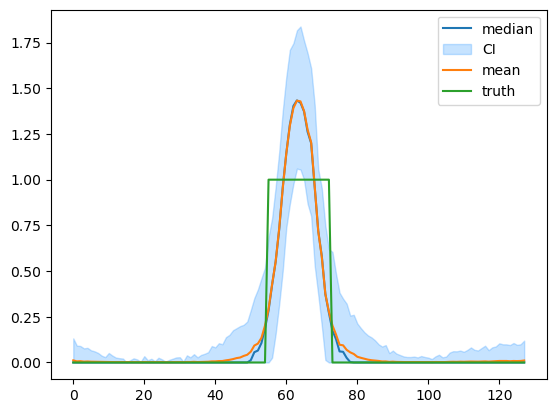

Plotting 5 randomly selected samples


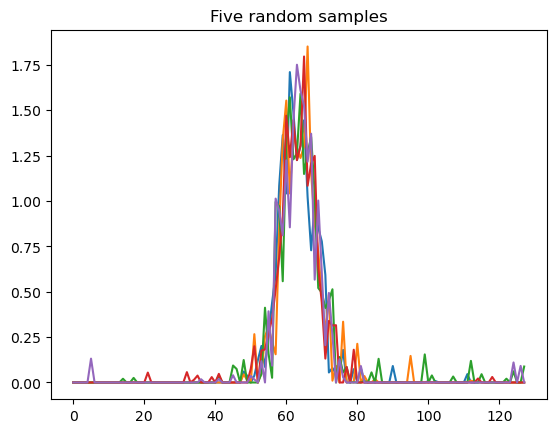

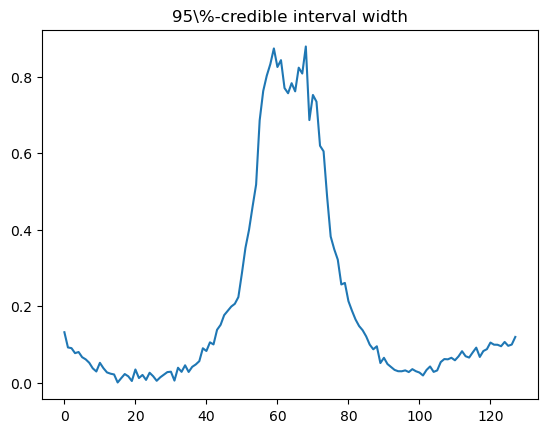

In [3]:
x  = NonnegativeGMRF(0.5*np.ones(n), 1)
y  = Gaussian(A@x, 0.001)

joint = JointDistribution(x, y)
posterior = joint(y=y_data)

sampler = RegularizedLinearRTO(posterior,
                                maxit=100,       # Maximum number of iterations for underlying FISTA solver
                                stepsize = 5e-4, # Stepsize for underlying FISTA solver, or set to "automatic" to automatically select the stepsize
                                abstol=1e-10)    # Absolute error tolerance for stopping criteria of underlying FISTA solver
samples = sampler.sample(num_samples, num_burnin)

plt.figure()
samples.plot_median() # Median is a more representative point-estimate for this distribution
samples.plot_ci()
plt.plot(info.exactSolution)
plt.legend(["median", "CI", "mean", "truth"])
plt.show()

plt.figure()
samples.plot()
plt.title("Five random samples")
plt.show()

plt.figure()
samples.plot_ci_width()
plt.title("95\%-credible interval width")
plt.show()

Sample 1100 / 1100


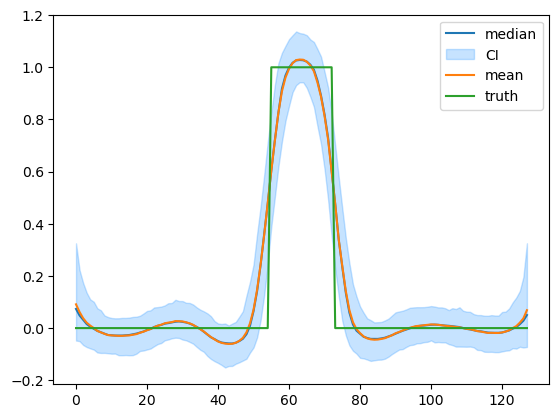

Plotting 5 randomly selected samples


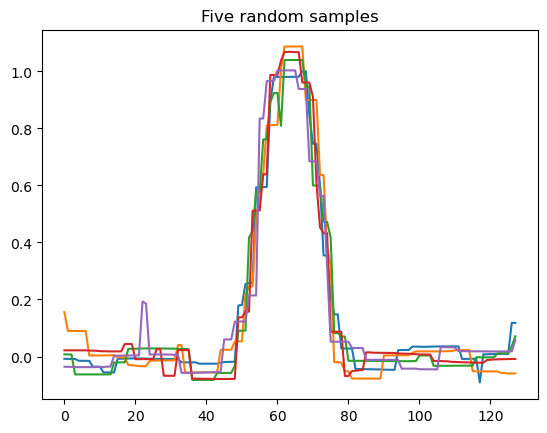

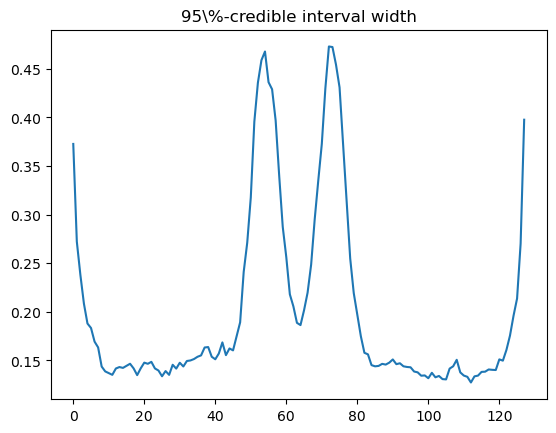

In [4]:
x  = RegularizedGMRF(0.5*np.ones(n), 5, proximal = lambda z, scale: denoise_tv_chambolle(z, 4*scale))
y  = Gaussian(A@x, 0.001)

joint = JointDistribution(x, y)
posterior = joint(y=y_data)

sampler = RegularizedLinearRTO(posterior,
                                maxit=100,
                                stepsize = 5e-4,
                                abstol=1e-10)
samples = sampler.sample(num_samples, num_burnin)

plt.figure()
samples.plot_median()
samples.plot_ci()
plt.plot(info.exactSolution)
plt.legend(["median", "CI", "mean", "truth"])
plt.show()

plt.figure()
samples.plot()
plt.title("Five random samples")
plt.show()

plt.figure()
samples.plot_ci_width()
plt.title("95\%-credible interval width")
plt.show()

c:\Users\jmev\Documents\GitHub\CUQIpy\demos\..\cuqi\distribution\_gaussian.py:681: RuntimeWarning: divide by zero encountered in log
  logdet = np.sum(-np.log(precision))


Sample 1100 / 1100


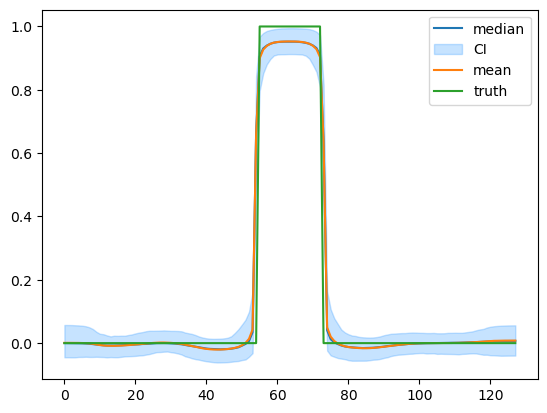

Plotting 5 randomly selected samples


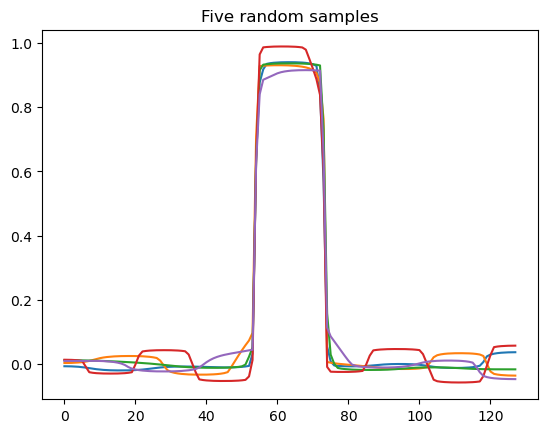

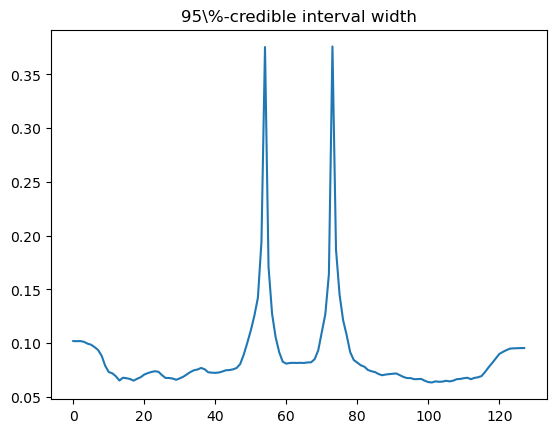

In [5]:
x  = RegularizedUnboundedUniform(A.domain_geometry, proximal = lambda z, scale: denoise_tv_chambolle(z, 5*scale))
y  = Gaussian(A@x, 0.001)

joint = JointDistribution(x, y)
posterior = joint(y=y_data)

sampler = RegularizedLinearRTO(posterior,
                                maxit=100,
                                stepsize = 5e-4,
                                abstol=1e-10)
samples = sampler.sample(num_samples, num_burnin)

plt.figure()
samples.plot_median()
samples.plot_ci()
plt.plot(info.exactSolution)
plt.legend(["median", "CI", "mean", "truth"])
plt.show()

plt.figure()
samples.plot()
plt.title("Five random samples")
plt.show()

plt.figure()
samples.plot_ci_width()
plt.title("95\%-credible interval width")
plt.show()